In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})

In E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
prchas_bhvor_df = pd.read_csv('QVI_purchase_behaviour.csv')
transction_data_df = pd.read_excel('QVI_transaction_data.xlsx')


In [3]:
# Printing top 5 rows from QVI_purchase_behaviour.csv
prchas_bhvor_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
# Printing top 5 rows from QVI_transaction_data.xlsx
transction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print('In QVI_purchase_behaviour.csv Number of rows = {0} and number of columns = {1}'.format(
    len(prchas_bhvor_df),len(prchas_bhvor_df.columns)))
print('In QVI_transaction_data.xlsx Number of rows = {0} and number of columns = {1}'.format(
    len(transction_data_df),len(transction_data_df.columns)))

In QVI_purchase_behaviour.csv Number of rows = 72637 and number of columns = 3
In QVI_transaction_data.xlsx Number of rows = 264836 and number of columns = 8


In [6]:
print('DataFileName                 ColumnNames')
print('QVI_purchase_behaviour.csv   {0}'.format(prchas_bhvor_df.columns))
print('QVI_transaction_data.xlsx    {0}'.format(transction_data_df.columns))

DataFileName                 ColumnNames
QVI_purchase_behaviour.csv   Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')
QVI_transaction_data.xlsx    Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [7]:
# Overall Info on purchase behavior
prchas_bhvor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
# Overall Info on Transaction data
transction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


In [9]:
import datetime as dt
transction_data_df['DATE']= pd.TimedeltaIndex(transction_data_df['DATE'], unit='d') + dt.datetime(1900,1,1)

In [10]:
transction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 15.2+ MB


In [32]:
transaction_data = transction_data_df.sort_values(by='DATE').reset_index().drop(['index'], axis=1).copy()
transaction_data[['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR']]= transaction_data[['STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR']].astype(str)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


In [33]:
print(transaction_data.LYLTY_CARD_NBR.unique())

['19205' '189381' '124236' ... '99020' '38458' '186152']


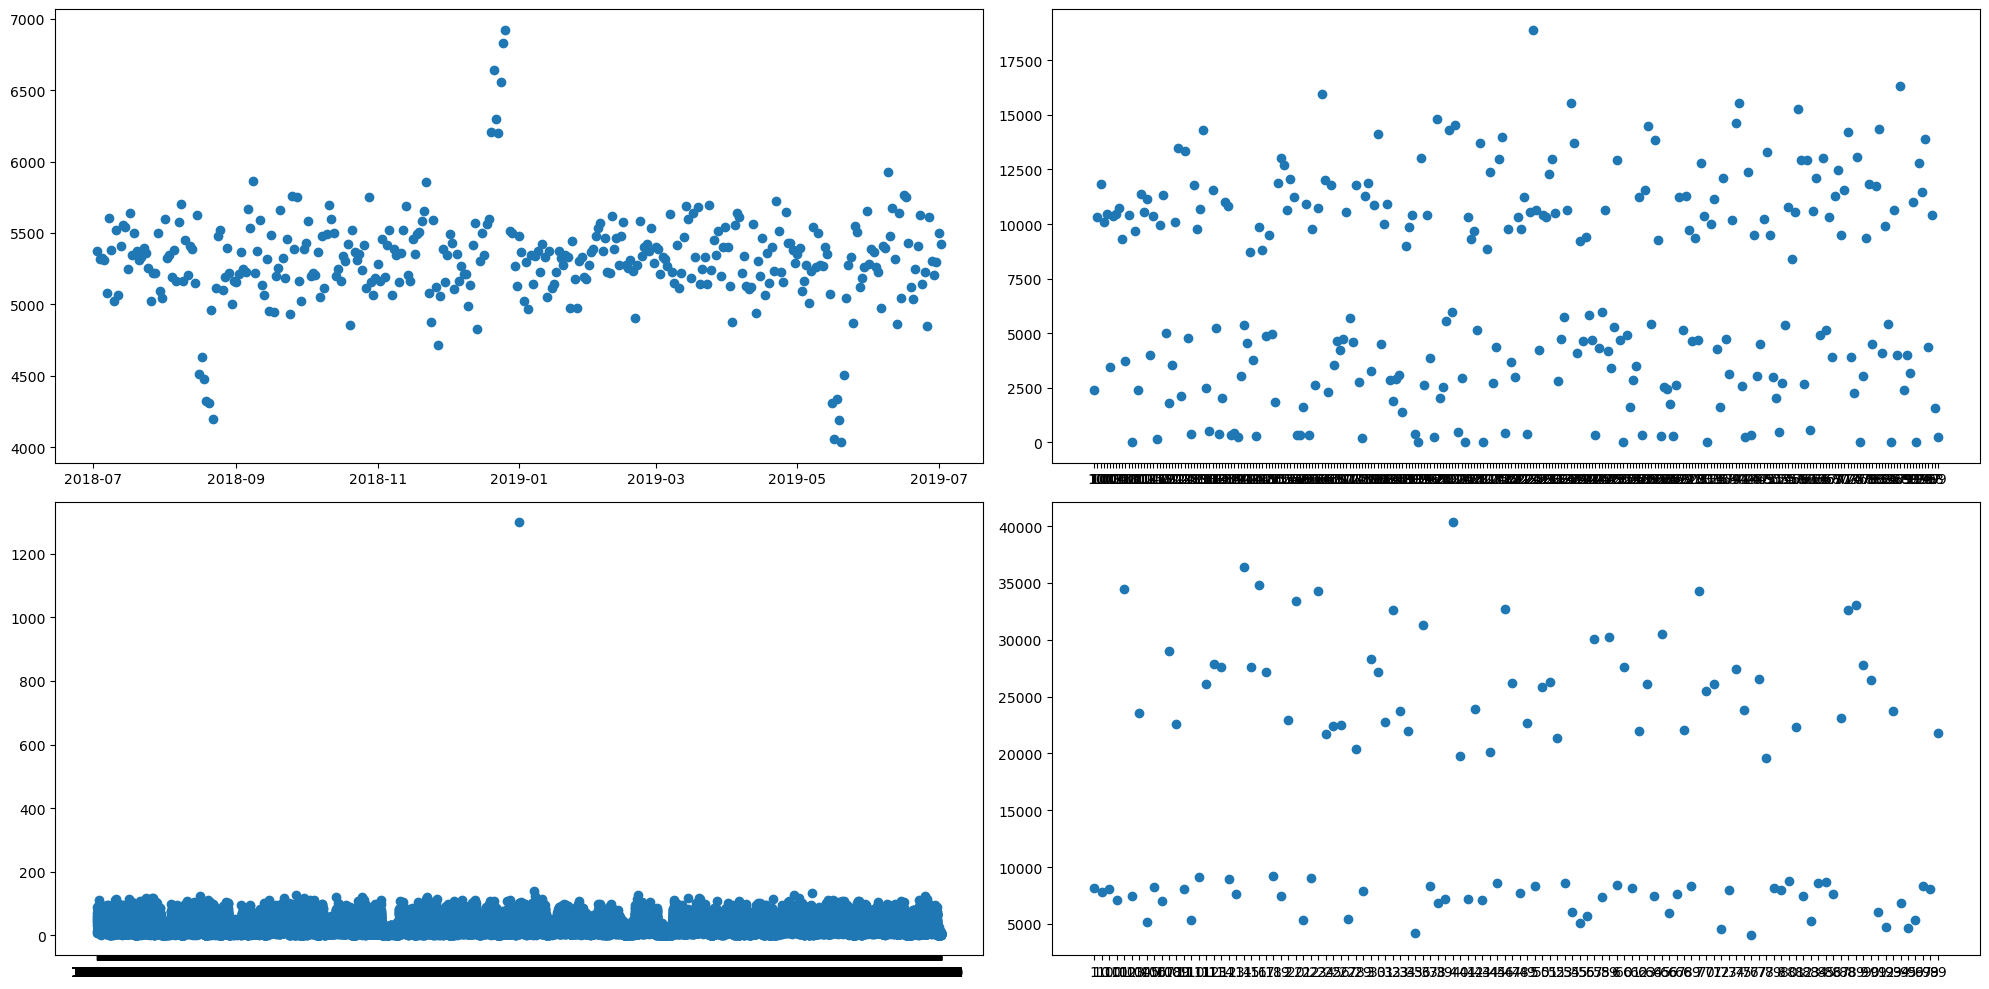

In [34]:
cols = ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'PROD_NBR']
count = 1
for c in cols:
    tmp_data = transaction_data[[c,'TOT_SALES']].copy()
    tmp_data = tmp_data.groupby(c).agg(['sum']).reset_index()
    plt.subplot(2, 2, count)
    plt.scatter(x = tmp_data[c], y = tmp_data['TOT_SALES'])
    #print(tmp_data)
    #ax[count][0].plot(tmp_data[c], tmp_data['TOT_SALES'])
    count+=1
    #tmp_data.plot(x=c, y='TOT_SALES', kind='bar', ax =(count,0))
plt.tight_layout()
plt.show()